In [1]:
import numpy as np
from matplotlib import pyplot as pl
from nilearn import datasets, plotting, image, input_data
#this line makes figures plotted in the notebook, instead of in a pop-up window.
%matplotlib inline

/Users/liamcreedon/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
ls -alh ../FinalProject/Haxby2001_subj1

total 614840
drwxr-xr-x@ 10 liamcreedon  staff   320B Sep 23 15:07 ./
drwxr-xr-x   8 liamcreedon  staff   256B Dec 11 11:32 ../
-rwxr-xr-x@  1 liamcreedon  staff   6.6M Sep  6 12:50 anat.nii.gz*
-rwxr-xr-x@  1 liamcreedon  staff   294M Sep  6 12:50 bold.nii.gz*
-rwxr-xr-x@  1 liamcreedon  staff    12K Sep  6 12:50 labels.txt*
-rwxr-xr-x@  1 liamcreedon  staff   1.3K Sep  6 12:50 mask4_vt.nii.gz*
-rwxr-xr-x@  1 liamcreedon  staff   775B Sep  6 12:50 mask8_face_vt.nii.gz*
-rwxr-xr-x@  1 liamcreedon  staff   1.0K Sep  6 12:50 mask8_house_vt.nii.gz*
-rwxr-xr-x@  1 liamcreedon  staff   791B Sep  6 12:50 mask8b_face_vt.nii.gz*
-rwxr-xr-x@  1 liamcreedon  staff   1.0K Sep  6 12:50 mask8b_house_vt.nii.gz*


In [3]:
#locating data to be used from local directory
data_dir = 'Haxby2001_subj1/' 
fmri_fname = data_dir+'bold.nii.gz'
anat_fname = data_dir+'anat.nii.gz'

In [4]:
#loading of fmri image
fmri_img = image.load_img(fmri_fname) 
print(fmri_img)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (40, 64, 64, 1452)
affine: 
[[  -3.5      0.       0.      68.25 ]
 [   0.       3.75     0.    -118.125]
 [   0.       0.       3.75  -118.125]
 [   0.       0.       0.       1.   ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [   4   40   64   64 1452    1    1    1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.   3.5  3.75 3.75 2.5  0.   0.   0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 2753.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip      

In [5]:
#uploads and displays ffa mask
mask_fname = data_dir+'mask8_face_vt.nii.gz'
ffa_mask = image.load_img(mask_fname)

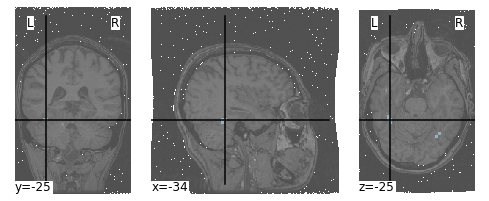

In [6]:
plotting.plot_roi(ffa_mask,bg_img=anat_fname,cmap='Paired',black_bg=0)

In [7]:
pl.close()

In [8]:
#transforming data to fit the mask
masker = input_data.NiftiMasker(mask_img=mask_fname,standardize=True)
fmri_masked = masker.fit_transform(fmri_fname)
print('Original whole-brain data shape:', fmri_img.shape)
print('After masking:',fmri_masked.shape)

Original whole-brain data shape: (40, 64, 64, 1452)
After masking: (1452, 9)


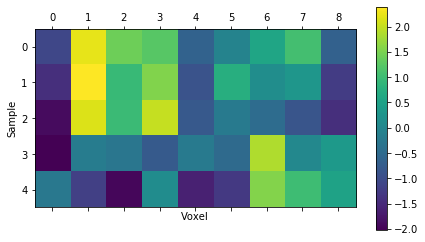

In [9]:
#showing some samples and voxels
pl.matshow(fmri_masked[np.asarray([10,50,100,1000,1200]),:15]) 
pl.colorbar() #Add a colorbar
pl.xlabel('Voxel')
pl.ylabel('Sample')
pl.show()

In [10]:
lbl_fname = data_dir+'labels.txt'

#Read text file and store labels (category and run) of the samples in two lists
n_samples = fmri_img.shape[3]
print('Number of samples = %d' % n_samples)
ctgs = []
runs = np.zeros(n_samples) #aka chunks
f = open(lbl_fname,'r')
print(f.readline()) 
for iline,line in enumerate(f.readlines()):
    (ctg, run) = line.rstrip().split(' ')
    ctgs.append(ctg)
    runs[iline] = run
f.close()
ctgs = np.asarray(ctgs) #convert to Numpy array, easier to handle
print('Total %d samples, %d runs:' % (len(ctgs),np.max(runs)+1))
print(np.unique(runs))

Number of samples = 1452
labels chunks

Total 1452 samples, 12 runs:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]


In [11]:
#extract the unique values of the 'lbls' list and display it alphebatically
experimentalConditons = np.sort(np.unique(ctgs))
print('We have %d exp conditions:%s' % (len(experimentalConditons),experimentalConditons))

We have 9 exp conditions:['bottle' 'cat' 'chair' 'face' 'house' 'rest' 'scissors' 'scrambledpix'
 'shoe']


In [40]:
#removing unwanted categories from the data (8way)
#only removing 'rest' category
mask_of_the_targ_ctgs = np.asarray([ctg != 'rest' for ctg in ctgs]) 
ds8 = fmri_masked[mask_of_the_targ_ctgs]
lbls8_ctg = ctgs[mask_of_the_targ_ctgs]
lbls8_run = runs[mask_of_the_targ_ctgs]
print(lbls8_ctg.shape, lbls8_run.shape)

(864,) (864,)


In [41]:
#removing unwanted categories from the data (2way)
#removing every category besides 'face'
mask_of_face_ctgs = np.asarray([ctg == 'face' for ctg in ctgs])
ds2 = fmri_masked[mask_of_face_ctgs]
lbls2_ctg = ctgs[mask_of_face_ctgs]
lbls2_run = runs[mask_of_face_ctgs]
print(lbls2_ctg.shape, lbls2_run.shape)

(108,) (108,)


In [42]:
#training the classifiers
from sklearn import neighbors

#instantiate 8 way classifier with 3 different k values
clf81 = neighbors.KNeighborsClassifier(n_neighbors=1, metric='correlation')
clf83 = neighbors.KNeighborsClassifier(n_neighbors=3, metric='correlation')
clf810 = neighbors.KNeighborsClassifier(n_neighbors=10, metric='correlation')

#instantiate 2 way classifier with 3 different k values
clf21 = neighbors.KNeighborsClassifier(n_neighbors=1, metric='correlation')
clf23 = neighbors.KNeighborsClassifier(n_neighbors=3, metric='correlation')
clf210 = neighbors.KNeighborsClassifier(n_neighbors=10, metric='correlation')

#training each classifier with fit function

clf81.fit(ds8, lbls8_ctg)
clf83.fit(ds8, lbls8_ctg)
clf810.fit(ds8, lbls8_ctg)

clf21.fit(ds2, lbls2_ctg)
clf23.fit(ds2, lbls2_ctg)
clf210.fit(ds2, lbls2_ctg)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='correlation',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [43]:
#getting predicted lables from classifier
lbls81_pred = clf81.predict(ds8)
lbls83_pred = clf83.predict(ds8)
lbls810_pred = clf810.predict(ds8)

lbls21_pred = clf21.predict(ds2)
lbls23_pred = clf23.predict(ds2)
lbls210_pred = clf210.predict(ds2)

In [44]:
#setting up cross validation method for testing classifier
from sklearn import metrics
from sklearn import model_selection
cv = model_selection.LeaveOneGroupOut() 
print(cv.get_n_splits(ds8, groups=runs))
print(cv.get_n_splits(ds2, groups=runs))

12
12


In [45]:
#cross validation (repeated for each classifier below)

accuracies81 = [] #accuracy of each iteration
n_success81 = 0 #total number of successful classifications

for icv, (id_trainSet, id_testSet) in enumerate(cv.split(ds8,groups=lbls8_run)):
    # Use the indices to get the training and test set from the dataset and the sample labels
    trainSet = ds8[id_trainSet]
    testSet = ds8[id_testSet]
    print("Shape of train and test set: %s, %s" % (trainSet.shape, testSet.shape))
    # get category lbls for training and test sets respectively
    lbls_train = lbls8_ctg[id_trainSet]
    lbls_true = lbls8_ctg[id_testSet]
    #calculate accuracy
    clf81.fit(trainSet, lbls_train)
    lbls81_pred = clf81.predict(testSet)
    acc = metrics.accuracy_score(lbls_true, lbls81_pred)
    print('CV %d-th iter,acc=%f,' % (icv,acc))
    #track the acc of each iteration
    accuracies81.append(acc) 
    #track of number of success:
    n_success81 = n_success81+np.sum(lbls_true==lbls81_pred)
    
print(n_success81)

Shape of train and test set: (792, 9), (72, 9)
CV 0-th iter,acc=0.125000,
Shape of train and test set: (792, 9), (72, 9)
CV 1-th iter,acc=0.250000,
Shape of train and test set: (792, 9), (72, 9)
CV 2-th iter,acc=0.222222,
Shape of train and test set: (792, 9), (72, 9)
CV 3-th iter,acc=0.138889,
Shape of train and test set: (792, 9), (72, 9)
CV 4-th iter,acc=0.263889,
Shape of train and test set: (792, 9), (72, 9)
CV 5-th iter,acc=0.166667,
Shape of train and test set: (792, 9), (72, 9)
CV 6-th iter,acc=0.250000,
Shape of train and test set: (792, 9), (72, 9)
CV 7-th iter,acc=0.111111,
Shape of train and test set: (792, 9), (72, 9)
CV 8-th iter,acc=0.097222,
Shape of train and test set: (792, 9), (72, 9)
CV 9-th iter,acc=0.055556,
Shape of train and test set: (792, 9), (72, 9)
CV 10-th iter,acc=0.138889,
Shape of train and test set: (792, 9), (72, 9)
CV 11-th iter,acc=0.111111,
139


In [46]:
accuracies810 = []
n_success810 = 0
for icv, (id_trainSet, id_testSet) in enumerate(cv.split(ds8,groups=lbls8_run)):
    trainSet = ds8[id_trainSet]
    testSet = ds8[id_testSet]
    print("Shape of train and test set: %s, %s" % (trainSet.shape, testSet.shape))
    lbls_train = lbls8_ctg[id_trainSet]
    lbls_true = lbls8_ctg[id_testSet]
    clf810.fit(trainSet, lbls_train)
    lbls810_pred = clf810.predict(testSet)
    acc = metrics.accuracy_score(lbls_true, lbls810_pred)
    print('CV %d-th iter,acc=%f,' % (icv,acc))
    accuracies810.append(acc)
    n_success810 = n_success810+np.sum(lbls_true==lbls810_pred)
print(n_success810)

Shape of train and test set: (792, 9), (72, 9)
CV 0-th iter,acc=0.194444,
Shape of train and test set: (792, 9), (72, 9)
CV 1-th iter,acc=0.250000,
Shape of train and test set: (792, 9), (72, 9)
CV 2-th iter,acc=0.194444,
Shape of train and test set: (792, 9), (72, 9)
CV 3-th iter,acc=0.125000,
Shape of train and test set: (792, 9), (72, 9)
CV 4-th iter,acc=0.250000,
Shape of train and test set: (792, 9), (72, 9)
CV 5-th iter,acc=0.180556,
Shape of train and test set: (792, 9), (72, 9)
CV 6-th iter,acc=0.194444,
Shape of train and test set: (792, 9), (72, 9)
CV 7-th iter,acc=0.097222,
Shape of train and test set: (792, 9), (72, 9)
CV 8-th iter,acc=0.097222,
Shape of train and test set: (792, 9), (72, 9)
CV 9-th iter,acc=0.013889,
Shape of train and test set: (792, 9), (72, 9)
CV 10-th iter,acc=0.041667,
Shape of train and test set: (792, 9), (72, 9)
CV 11-th iter,acc=0.097222,
125


In [47]:
accuracies83 = []
n_success83 = 0
for icv, (id_trainSet, id_testSet) in enumerate(cv.split(ds8,groups=lbls8_run)):
    trainSet = ds8[id_trainSet]
    testSet = ds8[id_testSet]
    print("Shape of train and test set: %s, %s" % (trainSet.shape, testSet.shape))
    lbls_train = lbls8_ctg[id_trainSet]
    lbls_true = lbls8_ctg[id_testSet]
    clf83.fit(trainSet, lbls_train)
    lbls83_pred = clf83.predict(testSet)
    acc = metrics.accuracy_score(lbls_true, lbls83_pred)
    print('CV %d-th iter,acc=%f,' % (icv,acc))
    accuracies83.append(acc)
    n_success83 = n_success83+np.sum(lbls_true==lbls83_pred)
print(n_success83)

Shape of train and test set: (792, 9), (72, 9)
CV 0-th iter,acc=0.125000,
Shape of train and test set: (792, 9), (72, 9)
CV 1-th iter,acc=0.208333,
Shape of train and test set: (792, 9), (72, 9)
CV 2-th iter,acc=0.166667,
Shape of train and test set: (792, 9), (72, 9)
CV 3-th iter,acc=0.138889,
Shape of train and test set: (792, 9), (72, 9)
CV 4-th iter,acc=0.236111,
Shape of train and test set: (792, 9), (72, 9)
CV 5-th iter,acc=0.180556,
Shape of train and test set: (792, 9), (72, 9)
CV 6-th iter,acc=0.152778,
Shape of train and test set: (792, 9), (72, 9)
CV 7-th iter,acc=0.083333,
Shape of train and test set: (792, 9), (72, 9)
CV 8-th iter,acc=0.083333,
Shape of train and test set: (792, 9), (72, 9)
CV 9-th iter,acc=0.055556,
Shape of train and test set: (792, 9), (72, 9)
CV 10-th iter,acc=0.069444,
Shape of train and test set: (792, 9), (72, 9)
CV 11-th iter,acc=0.125000,
117


In [48]:
accuracies21 = [] 
n_success21 = 0
for icv, (id_trainSet, id_testSet) in enumerate(cv.split(ds2,groups=lbls2_run)):
    trainSet = ds2[id_trainSet]
    testSet = ds2[id_testSet]
    print("Shape of train and test set: %s, %s" % (trainSet.shape, testSet.shape))
    lbls_train = lbls2_ctg[id_trainSet]
    lbls_true = lbls2_ctg[id_testSet]
    clf21.fit(trainSet, lbls_train)
    lbls21_pred = clf21.predict(testSet)
    acc = metrics.accuracy_score(lbls_true, lbls21_pred)
    print('CV %d-th iter,acc=%f,' % (icv,acc))
    accuracies21.append(acc)
    n_success21 = n_success21+np.sum(lbls_true==lbls21_pred)
print(n_success21)

Shape of train and test set: (99, 9), (9, 9)
CV 0-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 1-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 2-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 3-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 4-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 5-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 6-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 7-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 8-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 9-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 10-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 11-th iter,acc=1.000000,
108


In [49]:
accuracies23 = [] 
n_success23 = 0
for icv, (id_trainSet, id_testSet) in enumerate(cv.split(ds2,groups=lbls2_run)):
    trainSet = ds2[id_trainSet]
    testSet = ds2[id_testSet]
    print("Shape of train and test set: %s, %s" % (trainSet.shape, testSet.shape))
    lbls_train = lbls2_ctg[id_trainSet]
    lbls_true = lbls2_ctg[id_testSet]
    clf23.fit(trainSet, lbls_train)
    lbls23_pred = clf23.predict(testSet)
    acc = metrics.accuracy_score(lbls_true, lbls23_pred)
    print('CV %d-th iter,acc=%f,' % (icv,acc))
    accuracies23.append(acc)
    n_success23 = n_success23+np.sum(lbls_true==lbls23_pred)
print(n_success23)

Shape of train and test set: (99, 9), (9, 9)
CV 0-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 1-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 2-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 3-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 4-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 5-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 6-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 7-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 8-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 9-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 10-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 11-th iter,acc=1.000000,
108


In [50]:
accuracies210 = []
n_success210 = 0
for icv, (id_trainSet, id_testSet) in enumerate(cv.split(ds2,groups=lbls2_run)):
    trainSet = ds2[id_trainSet]
    testSet = ds2[id_testSet]
    print("Shape of train and test set: %s, %s" % (trainSet.shape, testSet.shape))
    lbls_train = lbls2_ctg[id_trainSet]
    lbls_true = lbls2_ctg[id_testSet]
    clf210.fit(trainSet, lbls_train)
    lbls210_pred = clf210.predict(testSet)
    acc = metrics.accuracy_score(lbls_true, lbls210_pred)
    print('CV %d-th iter,acc=%f,' % (icv,acc))
    accuracies210.append(acc)
    n_success210 = n_success210+np.sum(lbls_true==lbls210_pred)
print(n_success210)

Shape of train and test set: (99, 9), (9, 9)
CV 0-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 1-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 2-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 3-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 4-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 5-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 6-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 7-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 8-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 9-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 10-th iter,acc=1.000000,
Shape of train and test set: (99, 9), (9, 9)
CV 11-th iter,acc=1.000000,
108


In [53]:
chanceLevel = 1./8

#getting mean accuracies for each classifier

print('Mean accuracy 8-way(k=1) = %.4f +/- %.4f' % (np.mean(accuracies81),np.std(accuracies81)))
print('Mean accuracy 8-way(k=3) = %.4f +/- %.4f' % (np.mean(accuracies83),np.std(accuracies83)))
print('Mean accuracy 8-way(k=10) = %.4f +/- %.4f' % (np.mean(accuracies810),np.std(accuracies810)))
print('Mean accuracy 2-way(k=1)  = %.4f +/- %.4f' % (np.mean(accuracies21),np.std(accuracies21)))
print('Mean accuracy 2-way(k=3) = %.4f +/- %.4f' % (np.mean(accuracies23),np.std(accuracies23)))
print('Mean accuracy 2-way(k=10) = %.4f +/- %.4f' % (np.mean(accuracies210),np.std(accuracies210)))

Mean accuracy 8-way(k=1) = 0.1609 +/- 0.0662
Mean accuracy 8-way(k=3) = 0.1354 +/- 0.0541
Mean accuracy 8-way(k=10) = 0.1447 +/- 0.0740
Mean accuracy 2-way(k=1)  = 1.0000 +/- 0.0000
Mean accuracy 2-way(k=3) = 1.0000 +/- 0.0000
Mean accuracy 2-way(k=10) = 1.0000 +/- 0.0000


In [52]:
from scipy import stats as spst

n8_total = ds8.shape[0]
n2_total = ds2.shape[0]

#running binomial p test for significance testing

bino_p81 = spst.binom_test(n_success81, n8_total, p=chanceLevel)
bino_p83 = spst.binom_test(n_success83, n8_total, p=chanceLevel)
bino_p810 = spst.binom_test(n_success810, n8_total, p=chanceLevel)

bino_p21 = spst.binom_test(n_success21, n2_total, p=chanceLevel)
bino_p23 = spst.binom_test(n_success23, n2_total, p=chanceLevel)
bino_p210 = spst.binom_test(n_success210, n2_total, p=chanceLevel)

print('8-way (k=1) Classify correctly %d out of %d times, Binomial p=%.8f' % \
     (n_success81, n8_total, bino_p81))
print('8-way (k=3) Classify correctly %d out of %d times, Binomial p=%.8f' % \
     (n_success83, n8_total, bino_p83))
print('8-way (k=10) Classify correctly %d out of %d times, Binomial p=%.8f' % \
     (n_success810, n8_total, bino_p810))

print('2-way (k=1) Classify correctly %d out of %d times, Binomial p=%.8f' % \
     (n_success21, n2_total, bino_p21))
print('2-way (k=3) Classify correctly %d out of %d times, Binomial p=%.8f' % \
     (n_success23, n2_total, bino_p23))
print('2-way (k=10) Classify correctly %d out of %d times, Binomial p=%.8f' % \
     (n_success210, n2_total, bino_p210))

8-way (k=1) Classify correctly 139 out of 864 times, Binomial p=0.00199526
8-way (k=3) Classify correctly 117 out of 864 times, Binomial p=0.35440982
8-way (k=10) Classify correctly 125 out of 864 times, Binomial p=0.08933866
2-way (k=1) Classify correctly 108 out of 108 times, Binomial p=0.00000000
2-way (k=3) Classify correctly 108 out of 108 times, Binomial p=0.00000000
2-way (k=10) Classify correctly 108 out of 108 times, Binomial p=0.00000000
